# 2009 vs 2014 : India Election Data Analysis

In this case study we'll be conducting an analysis of the results from the Indian Elections in 2009 and 2014. This type of study can be done for any country providing you have the election results datasets.

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Our Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Req'd global titile using fig.suptitle
from pylab import * 

## 1. Data Understanding and Cleaning

In [17]:
# Reading 2009 candidate dataset
LS09Cand = pd.read_csv("data/LS2009Candidate.csv")
LS09Cand.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0


In [18]:
LS09Cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST_CODE             8070 non-null   object 
 1   State name          8070 non-null   object 
 2   Month               8070 non-null   int64  
 3   Year                8070 non-null   int64  
 4   PC Number           8070 non-null   int64  
 5   PC name             8070 non-null   object 
 6   PC Type             8070 non-null   object 
 7   Candidate Name      8070 non-null   object 
 8   Candidate Sex       8027 non-null   object 
 9   Candidate Category  8027 non-null   object 
 10  Candidate Age       8027 non-null   float64
 11  Party Abbreviation  8027 non-null   object 
 12  Total Votes Polled  8027 non-null   float64
 13  Position            8027 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 882.8+ KB


In [19]:
LS09Cand.isna().sum()

ST_CODE                0
State name             0
Month                  0
Year                   0
PC Number              0
PC name                0
PC Type                0
Candidate Name         0
Candidate Sex         43
Candidate Category    43
Candidate Age         43
Party Abbreviation    43
Total Votes Polled    43
Position              43
dtype: int64

In [20]:
LS09Cand.describe()

,Month,Year,PC Number,Candidate Age,Total Votes Polled,Position
count,8070.0,8070.0,8070.000000,8027.000000,8027.000000,8027.000000
mean,3.0,2009.0,19.570384,45.837673,51708.935343,9.447739
std,0.0,0.0,17.042828,11.863180,110011.872022,6.771288
min,3.0,2009.0,1.000000,25.000000,118.000000,1.000000
25%,3.0,2009.0,7.000000,36.000000,1615.000000,4.000000
50%,3.0,2009.0,14.000000,45.000000,4068.000000,8.000000
75%,3.0,2009.0,28.000000,54.000000,17450.500000,13.000000
max,3.0,2009.0,80.000000,99.000000,832224.000000,43.000000


It is striking that the maximum age of the candidates is 99 years.

In [21]:
LS09Cand[(LS09Cand['State name']=="Andhra Pradesh") & (LS09Cand['Candidate Name']=="ZAHID ALI KHAN")]

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
113,S01,Andhra Pradesh,3,2009,9,Hyderabad,GEN,ZAHID ALI KHAN,M,GEN,66.0,TDP,194196.0,2.0
127,S01,Andhra Pradesh,3,2009,9,Hyderabad,GEN,ZAHID ALI KHAN,M,GEN,26.0,IND,953.0,16.0


It could be a homonym

In [22]:
# Exploring data 
print(len(LS09Cand['State name'].unique()))
LS09Cand['State name'].unique()

35


array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

<Axes: xlabel='Candidate Age', ylabel='Count'>

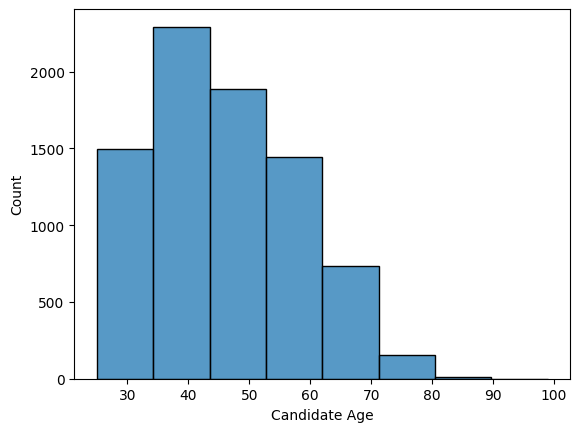

In [23]:
sns.histplot(x=LS09Cand['Candidate Age'], bins=8)

The largest number of candidates ranges between 34 and 52 years old.

In [24]:
# Reading 2014 candidate dataset
LS14Cand = pd.read_csv("data/LS2014Candidate.csv")
LS14Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,GODAM NAGESH,M,ST,49.0,TRS,430847,1
1,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NARESH,M,ST,37.0,INC,259557,2
2,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RAMESH RATHOD,M,ST,48.0,TDP,184198,3
3,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,RATHOD SADASHIV,M,ST,55.0,BSP,94420,4
4,S01,Andhra Pradesh,5,2014,1,Adilabad,ST,NETHAWATH RAMDAS,M,ST,44.0,IND,41032,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465,27
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438,28
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366,29
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309,30


In [25]:
LS14Cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8794 entries, 0 to 8793
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST_CODE             8794 non-null   object 
 1   State name          8794 non-null   object 
 2   Month               8794 non-null   int64  
 3   Year                8794 non-null   int64  
 4   PC Number           8794 non-null   int64  
 5   PC name             8794 non-null   object 
 6   PC Type             8794 non-null   object 
 7   Candidate Name      8794 non-null   object 
 8   Candidate Sex       8252 non-null   object 
 9   Candidate Category  8252 non-null   object 
 10  Candidate Age       8252 non-null   float64
 11  Party Abbreviation  8794 non-null   object 
 12  Total Votes Polled  8794 non-null   int64  
 13  Position            8794 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 962.0+ KB


In [26]:
LS14Cand.isna().sum()

ST_CODE                 0
State name              0
Month                   0
Year                    0
PC Number               0
PC name                 0
PC Type                 0
Candidate Name          0
Candidate Sex         542
Candidate Category    542
Candidate Age         542
Party Abbreviation      0
Total Votes Polled      0
Position                0
dtype: int64

In [27]:
LS14Cand.describe()

,Month,Year,PC Number,Candidate Age,Total Votes Polled,Position
count,8794.0,8794.0,8794.000000,8252.000000,8794.000000,8794.000000
mean,5.0,2014.0,19.521833,47.151600,62975.090516,9.788037
std,0.0,0.0,17.063619,11.903234,141162.794523,6.738093
min,5.0,2014.0,1.000000,25.000000,105.000000,1.000000
25%,5.0,2014.0,7.000000,38.000000,1762.000000,5.000000
50%,5.0,2014.0,15.000000,46.000000,4519.000000,9.000000
75%,5.0,2014.0,28.000000,56.000000,15225.000000,13.000000
max,5.0,2014.0,80.000000,93.000000,863358.000000,43.000000


<Axes: xlabel='Candidate Age', ylabel='Count'>

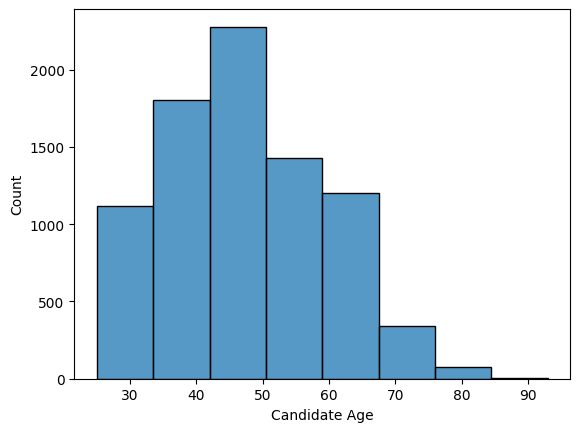

In [28]:
sns.histplot(x=LS14Cand['Candidate Age'], bins=8)

In [29]:
#Merging 2009 & 2014 Candidate datasets vertically stacking them
LS0914Cand = pd.concat([LS09Cand, LS14Cand])
LS0914Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465.0,27.0
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438.0,28.0
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366.0,29.0
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309.0,30.0


In [30]:
#Checking all political parties abbreviation so that we can make it conscise by including alliance & significant parties
print(len(LS0914Cand['Party Abbreviation'].unique()))
LS0914Cand['Party Abbreviation'].unique()

651


array(['TDP', 'INC', 'PRAP', 'BJP', 'BSP', 'IND', 'TRS', 'MCPI(S)',
       'PPOI', 'RPI(A)', 'LSP', 'TPPP', 'IJP', 'BSP(AP)', 'BPD', 'SP',
       'RKSP', 'MUL', 'ANC', 'UWF', 'SAP', 'AJBP', 'AIMIM', 'JD(S)',
       'MANP', 'GRIP', 'SJP(R)', 'CPI', 'CPM', 'RJD', 'BSSP', 'BHSASP',
       'JD(U)', 'RPI', 'RDHP', 'RDMP', 'CPI(ML)(L)', 'PBHP', 'RPI(KH)',
       'RPC(S)', 'BCUF', 'BJSH', 'RRS', nan, 'LB', 'AC', 'PPA', 'AUDF',
       'ASDC', 'NCP', 'RWS', 'BOPF', 'AGP', 'RVNP', 'LJP', 'RCPI(R)',
       'RSPS', 'AIMF', 'JMM', 'BVM', 'AIFB', 'SHS', 'LTSD', 'BJKVP',
       'BLPGL', 'BJJD', 'RSP', 'RPP', 'JGP', 'KSVP', 'RKJP', 'RJJM',
       'ABAS', 'ABJS', 'RSWD', 'AD', 'RMEP', 'PTSS', 'LPSP', 'SBSP',
       'SJTP', 'BMF', 'SLP(L)', 'KVSP', 'ABDBM', 'NBNP', 'BHJAP',
       'BSP(K)', 'JVM', 'BSKP', 'LM', 'JPS', 'EKSP', 'BUDM', 'BJKD',
       'JKM', 'PMSP', 'SSD', 'AJSP', 'RLD', 'STPI', 'MAG', 'UGDP', 'SGF',
       'BNJD', 'MJP', 'LSWP', 'VHS', 'NLHP', 'KKJHS', 'NSCP', 'RSP(S)',
       'ABMSD', 'S

### Creating an Alliance column for optimized substitution of Winning Party Abbreviation column


In [31]:
# Create a new column copyign the Party Abbreviation
LS0914Cand['Alliance'] = LS0914Cand['Party Abbreviation']

# Making the substitutions, this is hardcoded from our knowledge of the party alliances
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['INC','NCP', 'RJD', 'DMK', 'IUML', 'JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD'],value='UPA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['BJP','SS', 'LJP', 'SAD', 'RLSP', 'AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS','KMDK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC','KC(T)','BDJS','AGP','JSS','PPA','UDP','HSPDP','PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF'],value='NDA')
LS0914Cand['Alliance']=LS0914Cand['Alliance'].replace(to_replace=['YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM', 'KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL', 'JVM','MDMK'],value='Others')
LS0914Cand

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,U07,Puducherry,5,2014,1,Puducherry,GEN,PUVALA NAGESWARA RAO,M,GEN,60.0,IND,465.0,27.0,Others
8790,U07,Puducherry,5,2014,1,Puducherry,GEN,G. PALANI,M,GEN,59.0,CPI(ML)(L),438.0,28.0,CPI(ML)(L)
8791,U07,Puducherry,5,2014,1,Puducherry,GEN,MARIE UTHRIANATHAN,M,GEN,32.0,SAP,366.0,29.0,SAP
8792,U07,Puducherry,5,2014,1,Puducherry,GEN,S. CHITRAKALA,F,GEN,37.0,JD(U),309.0,30.0,NDA


### Getting the seats Won by the each Alliance

In [32]:
# Get the top position then group by alliance and year and sum
seats_won = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Alliance','Year'])['Position'].sum().reset_index()
seats_won

,Alliance,Year,Position
0,ADMK,2009,9.0
1,ADMK,2014,37.0
2,AITC,2009,19.0
3,AITC,2014,34.0
4,BJD,2009,14.0
5,BJD,2014,20.0
6,BSP,2009,21.0
7,CPM,2009,16.0
8,CPM,2014,9.0
9,NDA,2009,143.0


## Visualizing 2009 vs 2014

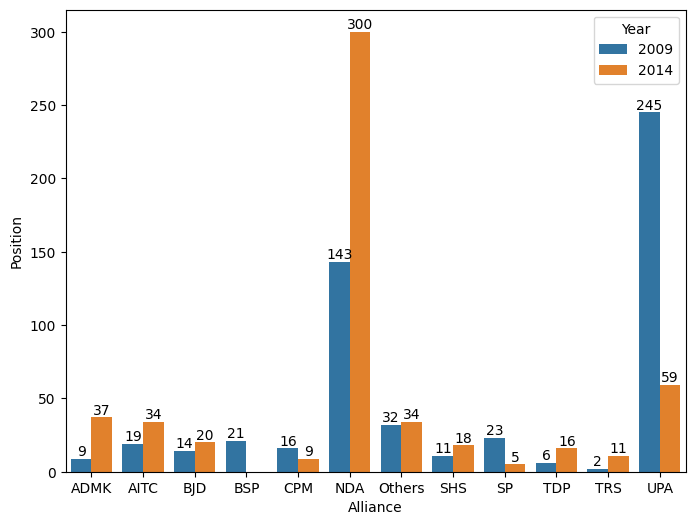

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(data=seats_won, x="Alliance", y="Position", hue="Year")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.show()

We observe that the 2 political forces with the greatest candidate victories are NDA and UPA, there is a decrease in the year 2014 of the candidates who won from the UPA compared to the year 2009 and an increase in the year 2014 of the candidates who won from the NDA compared to 2009

#### Comparing Candidate Categories

In [34]:
LS0914Cand.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP


In [35]:
CatWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Candidate Category','Year'])['Position'].sum().reset_index()
CatWin.head()

,Candidate Category,Year,Position
0,GEN,2009,403.0
1,GEN,2014,405.0
2,SC,2009,85.0
3,SC,2014,85.0
4,ST,2009,53.0


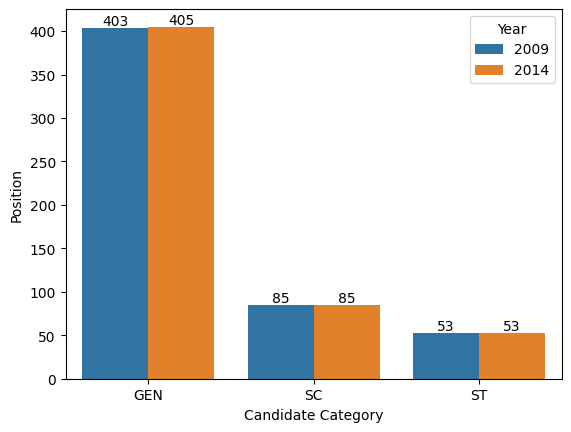

In [36]:
sns.barplot(CatWin, x="Candidate Category", y="Position", hue="Year")
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
plt.show()

#### Comparing Candidate Sex

In [37]:
SexWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['Candidate Sex','Year'])['Position'].sum().reset_index()
SexWin.head()

,Candidate Sex,Year,Position
0,F,2009,58.0
1,F,2014,62.0
2,M,2009,483.0
3,M,2014,481.0


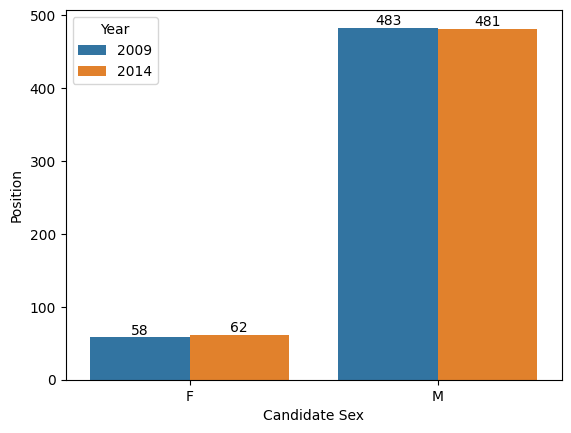

In [38]:
sns.barplot(data=SexWin, x="Candidate Sex", y="Position", hue="Year")

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

plt.show()

In [39]:
SexCount = LS0914Cand.groupby(['Candidate Sex','Year'])['Position'].count().reset_index()
SexCount.head()

,Candidate Sex,Year,Position
0,F,2009,552
1,F,2014,668
2,M,2009,7475
3,M,2014,7578
4,O,2014,6


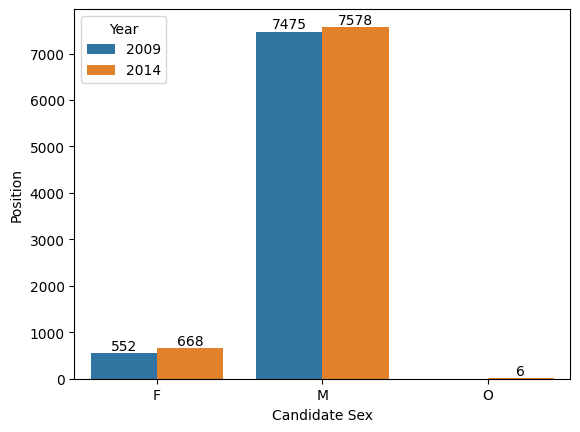

In [40]:
sns.barplot(data=SexCount, x="Candidate Sex", y="Position", hue="Year")

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')

plt.show()

There is a big difference between the number of male and female candidates running in elections.

#### Comparing Age Distriuction of the Winners

In [41]:
LS0914Cand['age_group'] = LS0914Cand['Candidate Age'].apply(lambda x: '[25, 35)' if x < 35 else '[35, 45)' 
                                  if x < 45 else '[45, 55)'
                                  if x < 55 else '[55, 65)' 
                                  if x < 65 else '[65, 75)'
                                  if x < 75 else '[75, 85)'
                                  if x < 85 else '85+')
LS0914Cand["age_group"] = LS0914Cand["age_group"].astype("object")

LS0914Cand.head()

,ST_CODE,State name,Month,Year,PC Number,PC name,PC Type,Candidate Name,Candidate Sex,Candidate Category,Candidate Age,Party Abbreviation,Total Votes Polled,Position,Alliance,age_group
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP,"[35, 45)"
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA,"[35, 45)"
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP,"[55, 65)"
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA,"[55, 65)"
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP,"[45, 55)"


In [42]:
AgeWin = LS0914Cand[(LS0914Cand.Position==1)].groupby(['age_group','Year'])['Position'].sum().reset_index()
AgeWin

,age_group,Year,Position
0,85+,2009,1.0
1,85+,2014,1.0
2,"[25, 35)",2009,23.0
3,"[25, 35)",2014,30.0
4,"[35, 45)",2009,104.0
5,"[35, 45)",2014,89.0
6,"[45, 55)",2009,167.0
7,"[45, 55)",2014,149.0
8,"[55, 65)",2009,159.0
9,"[55, 65)",2014,184.0


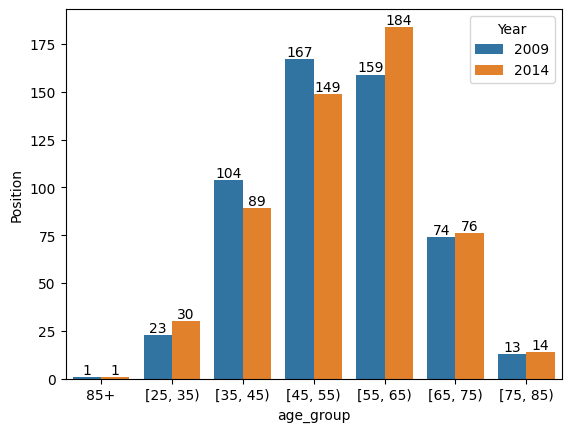

In [43]:
sns.barplot(data=AgeWin, x="age_group", y="Position", hue="Year")

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom')
    
plt.show()

The age of the candidates with the most victories ranges from 45 to 65 years old.

#### Comparing Voter Turnouts in each state for 2009 and 2014

In [44]:
# Reading 2009 Electors dataset
LS09Elec = pd.read_csv("data/LS2009Electors.csv")
print(LS09Elec.shape)
LS09Elec.head()

(543, 9)


,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE,Year
0,S01,Andhra Pradesh,1,Adilabad,864165,1131211,9,76.39,2009
1,S01,Andhra Pradesh,2,Peddapalle,905332,1315642,15,68.81,2009
2,S01,Andhra Pradesh,3,Karimnagar,990646,1496211,15,66.21,2009
3,S01,Andhra Pradesh,4,Nizamabad,891508,1333271,12,66.87,2009
4,S01,Andhra Pradesh,5,Zahirabad,1017372,1359566,10,74.83,2009


In [45]:
LS09Elec["Year"] = '2009'

In [46]:
# Reading 2014 Electors dataset

LS14Elec = pd.read_csv("data/LS2014Electors.csv")

print(LS09Elec.shape)
LS14Elec.head()

(543, 9)


,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,POLL PERCENTAGE,Year
0,S01,Andhra Pradesh,1,Adilabad,1055593,1386282,76.15,2014
1,S01,Andhra Pradesh,2,Peddapalle,1025194,1425355,71.93,2014
2,S01,Andhra Pradesh,3,Karimnagar,1127225,1550810,72.69,2014
3,S01,Andhra Pradesh,4,Nizamabad,1034032,1496193,69.11,2014
4,S01,Andhra Pradesh,5,Zahirabad,1099784,1445354,76.09,2014


In [47]:
LS09Elec.STATE.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [48]:
LS14Elec.STATE.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chattisgarh', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [49]:
LS14Elec['STATE']=LS14Elec['STATE'].replace(to_replace=['Odisha'],value='Orissa')
LS14Elec['STATE']=LS14Elec['STATE'].replace(to_replace=['Chhattisgarh'],value='Chattisgarh')

In [50]:
LS14Elec["Year"] = '2014'

In [51]:
LS0914Elec = pd.concat([LS09Elec, LS14Elec])

In [52]:
state_percentage = LS0914Elec.groupby(['STATE','Year'])['POLL PERCENTAGE'].mean().to_frame().reset_index()
state_percentage

,STATE,Year,POLL PERCENTAGE
0,Andaman & Nicobar Islands,2009,64.160000
1,Andaman & Nicobar Islands,2014,70.670000
2,Andhra Pradesh,2009,73.351429
3,Andhra Pradesh,2014,75.816190
4,Arunachal Pradesh,2009,68.650000
...,...,...,...
65,Uttar Pradesh,2014,58.599875
66,Uttarakhand,2009,52.952000
67,Uttarakhand,2014,60.762000
68,West Bengal,2009,81.551905


Text(0.5, 1.0, 'Voter Turnout States 2009 and 2014')

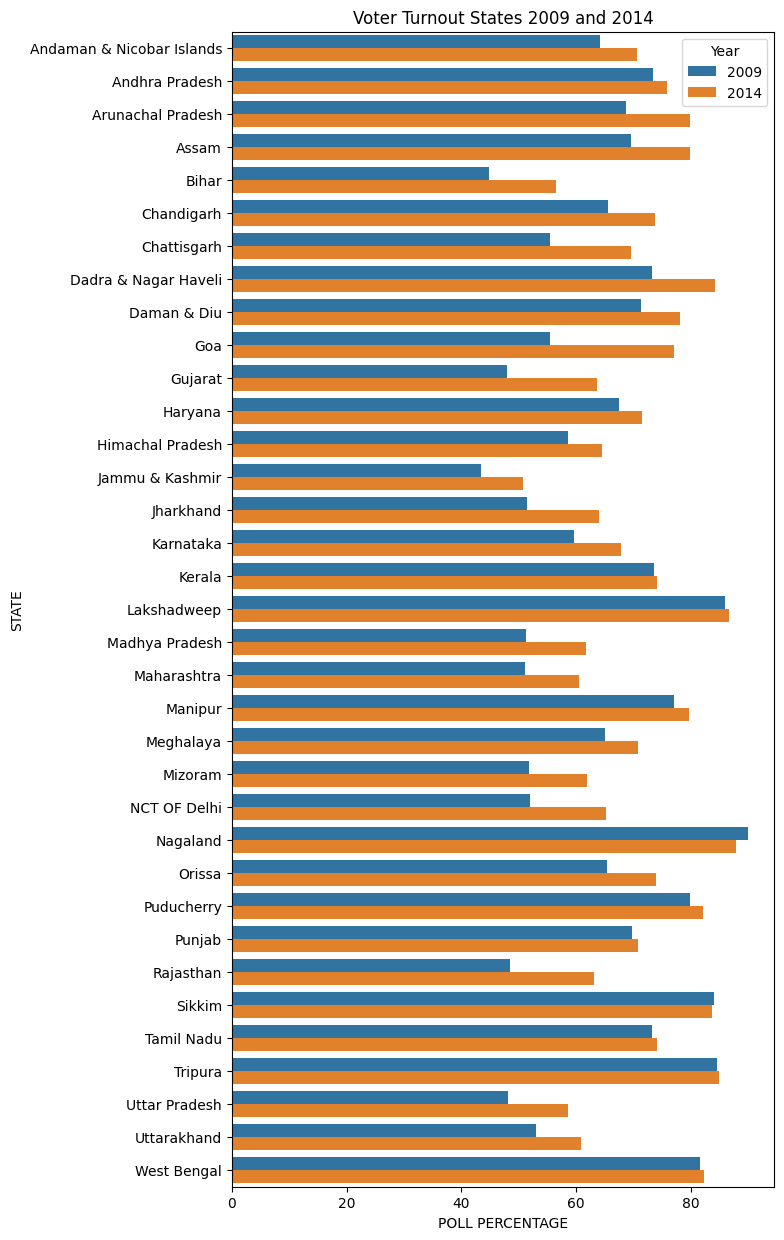

In [53]:
ax = plt.subplots(figsize=(7, 15))
sns.barplot(data=state_percentage, y='STATE',x='POLL PERCENTAGE',hue='Year')
plt.title('Voter Turnout States 2009 and 2014')